# Model for predicting USU Men's Basketball Outcome

### Steps:
1. Data Analysis
2. Data Visualization
3. Data Splitting
4. Models
5. Tuning
6. Evaluation

## Imports

In [47]:


# Data Handling and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier


# Model Evaluation and Optimization
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate, validation_curve, RandomizedSearchCV
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import reciprocal, randint

# Pipeline Construction
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

### Load Data

In [48]:
dataset_df = pd.read_csv('data/combined_merged_stats_all_teams_updated.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (571, 119)


## Data Exploration

In [49]:
dataset_df.head()

,rank,team,conf,record,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,...,USU_TORD,USU_ORB,USU_DRB,USU_FTR,USU_FTRD,USU_2P_O,USU_2P_D,USU_3P_O,USU_3P_D,USU_ADJ_T
0,202,Idaho,WAC,11-18,109.635748,57,112.924009,332,0.415847,202,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
1,209,Mount St. Mary's,NEC,18-14,102.351783,168,105.883279,249,0.403694,209,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
2,309,Texas A&M Corpus Chris,Slnd,5-23,96.127881,278,110.899246,315,0.161943,309,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
3,76,Weber St.,BSky,28-7,108.777978,66,98.686302,111,0.753928,76,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
4,72,Santa Clara,WCC,24-12,110.103495,52,99.533938,125,0.761442,72,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8


In [50]:
dataset_df.describe()

,rank,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,proj. W,Proj. L,Pro Con W,...,USU_TORD,USU_ORB,USU_DRB,USU_FTR,USU_FTRD,USU_2P_O,USU_2P_D,USU_3P_O,USU_3P_D,USU_ADJ_T
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,150.670753,104.722576,154.623468,102.261803,154.469352,0.553957,150.670753,16.751473,14.751154,8.537813,...,16.672335,29.234772,25.556345,34.704315,30.885279,52.041117,47.164213,36.056599,33.197462,67.039848
std,85.184033,6.409625,91.260472,5.106763,88.406678,0.217348,85.184033,6.355820,4.827281,3.863393,...,1.736810,4.318171,3.342383,3.192279,2.691876,3.101585,3.037017,2.695028,2.272973,2.320571
min,2.000000,88.133201,3.000000,87.901683,2.000000,0.050090,2.000000,0.000000,3.000000,0.000000,...,12.400000,21.700000,21.300000,28.900000,26.100000,46.800000,42.200000,31.200000,28.000000,61.800000
25%,81.500000,100.496338,83.000000,98.740017,83.000000,0.385169,81.500000,12.000000,11.000000,6.000000,...,15.800000,26.000000,22.400000,33.200000,29.000000,49.600000,44.900000,34.100000,32.300000,66.700000
50%,142.000000,105.350864,139.000000,102.217850,138.000000,0.554772,142.000000,17.000000,15.000000,9.000000,...,17.000000,29.200000,24.800000,34.900000,30.700000,52.500000,46.300000,35.700000,34.000000,68.000000
75%,215.500000,108.916089,229.500000,105.927516,220.000000,0.735669,215.500000,21.000000,18.000000,12.000000,...,17.600000,32.000000,26.800000,36.400000,33.525000,54.200000,48.800000,37.900000,35.200000,68.900000
max,351.000000,121.923826,350.000000,116.115624,351.000000,0.966030,351.000000,35.000000,28.000000,18.000000,...,19.700000,37.400000,34.000000,40.500000,34.300000,57.500000,53.000000,40.900000,36.000000,69.600000


In [51]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Columns: 119 entries, rank to USU_ADJ_T
dtypes: float64(94), int64(15), object(10)
memory usage: 531.0+ KB


***Check for null values***

In [52]:
dataset_df.isnull().sum().sort_values(ascending=False)

DRB            182
ADJ_T          182
EFG_O          182
EFG_D          182
TOR            182
              ... 
ConPA            0
ConPF            0
FUN              0
Qual Games       0
USU_Proj. L      0
Length: 119, dtype: int64

In [53]:
dataset_df.dtypes

rank           int64
team          object
conf          object
record        object
adjoe        float64
              ...   
USU_2P_O     float64
USU_2P_D     float64
USU_3P_O     float64
USU_3P_D     float64
USU_ADJ_T    float64
Length: 119, dtype: object

## Data Visualization

<Axes: >

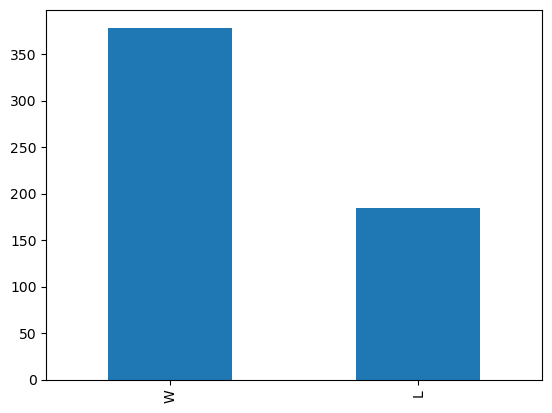

In [54]:
plot_df = dataset_df['Win/Loss'].value_counts()
plot_df.plot(kind='bar')

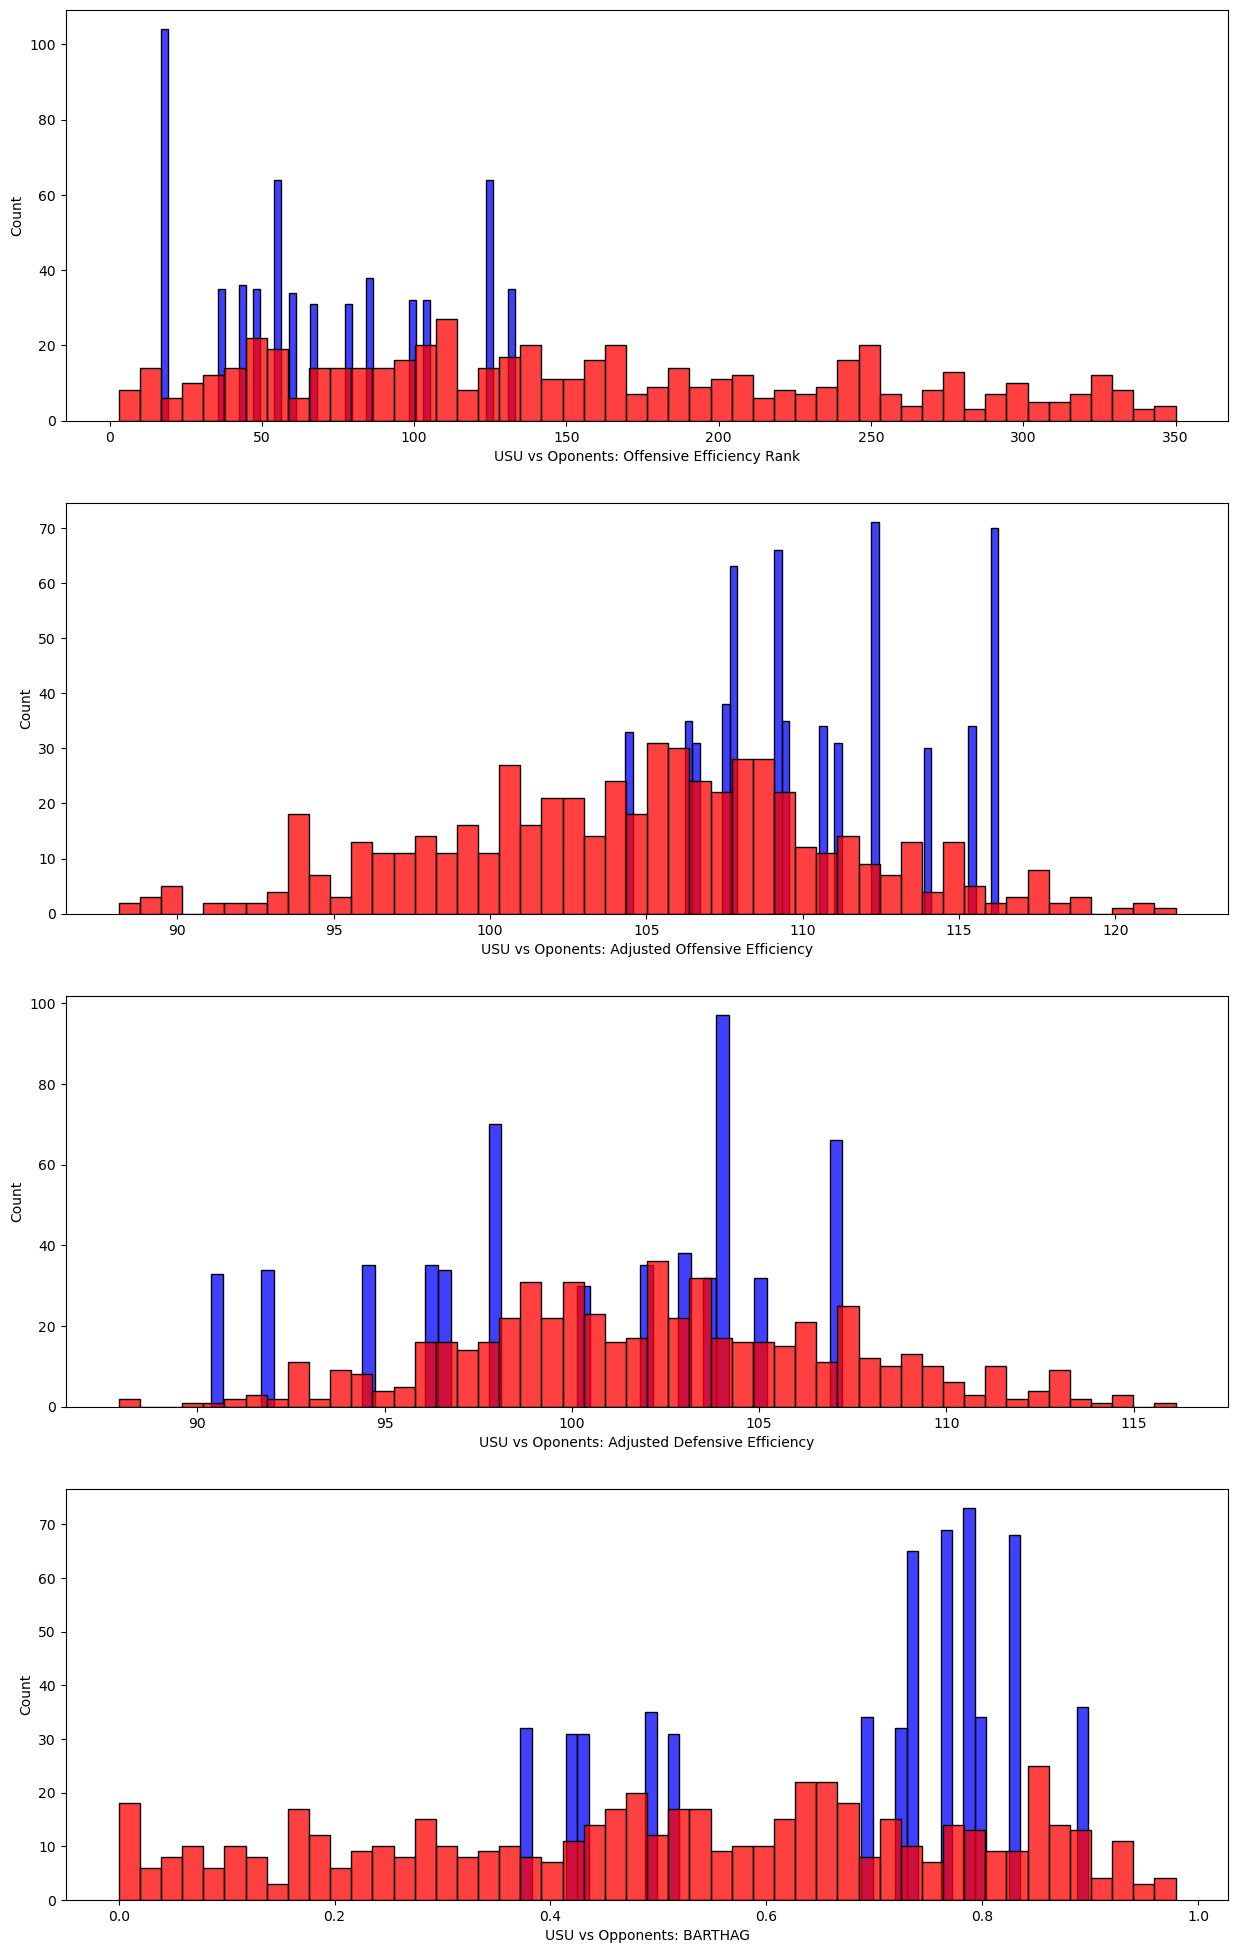

In [55]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))  # Adjusted to 3x1 grid
plt.subplots_adjust(top=2)

# Plotting and setting x-axis labels
sns.histplot(dataset_df['USU_oe Rank'], color='b', bins=50, ax=ax[0])
ax[0].set_xlabel('USU vs Oponents: Offensive Efficiency Rank')

sns.histplot(dataset_df['USU_adjoe'], color='b', bins=50, ax=ax[1])
ax[1].set_xlabel('USU vs Oponents: Adjusted Offensive Efficiency')

sns.histplot(dataset_df['USU_adjde'], color='b', bins=50, ax=ax[2])
ax[2].set_xlabel('USU vs Oponents: Adjusted Defensive Efficiency')

sns.histplot(dataset_df['USU_Qual Barthag'], color='b', bins=50, ax=ax[3])
ax[3].set_xlabel('USU vs Opponents: BARTHAG')
# Overlaying plots on the same axes
sns.histplot(dataset_df['oe Rank'], color='r', bins=50, ax=ax[0])
sns.histplot(dataset_df['adjoe'], color='r', bins=50, ax=ax[1])
sns.histplot(dataset_df['adjde'], color='r', bins=50, ax=ax[2])
sns.histplot(dataset_df['Qual Barthag'], color='r', bins=50, ax=ax[3])

plt.show()




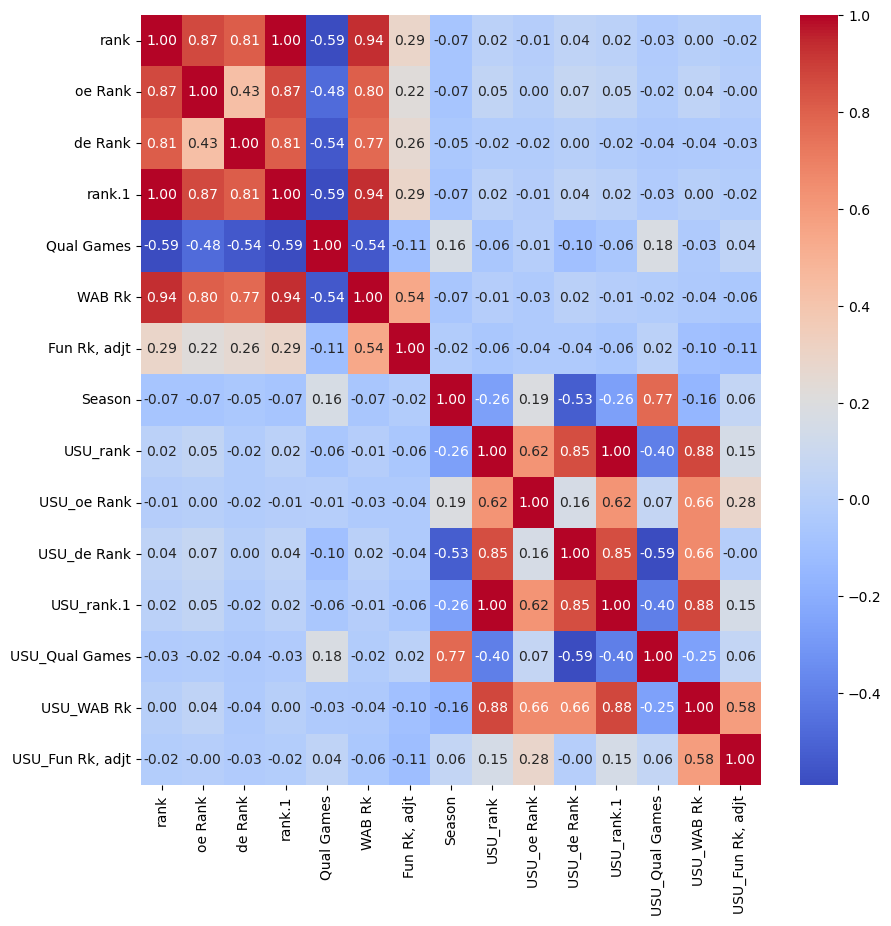

In [56]:
numeric_features = dataset_df.select_dtypes(include=[int]).columns.tolist()

# Convert 'Win/Loss' to numeric (1 for Win, 0 for Loss)

# Add 'Win/Loss_numeric' to the list of numeric features


# Create a new DataFrame with only the numeric features and 'Win/Loss_numeric'
df_numeric = dataset_df[numeric_features]

# Create a correlation matrix that includes 'Win/Loss_numeric'
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


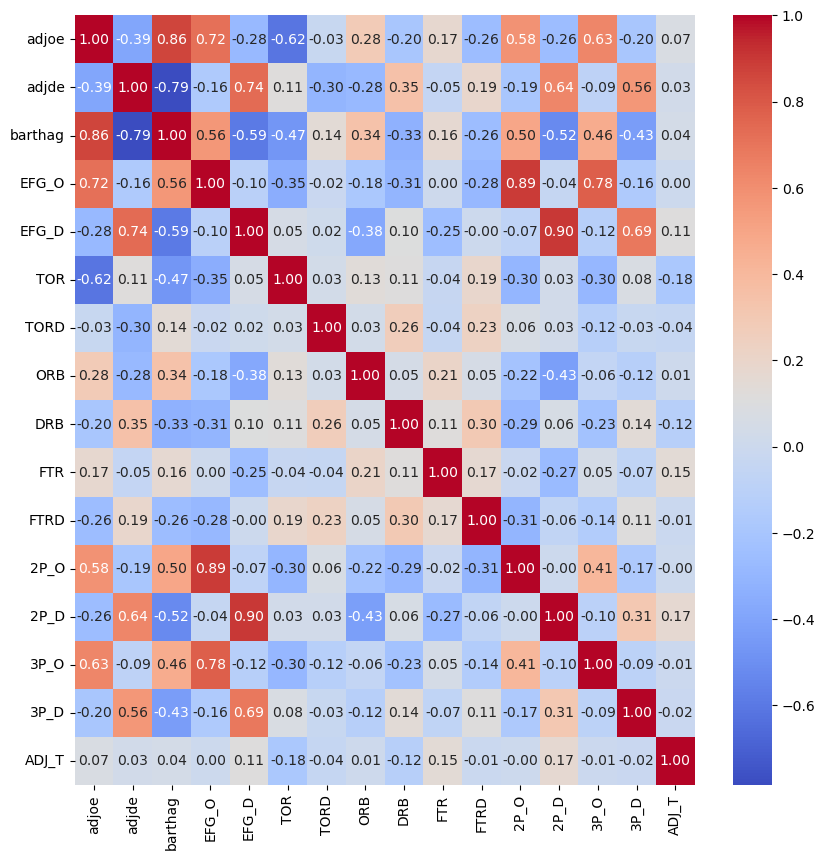

In [57]:
percentage_and_efficiency_features = ['adjoe', 'adjde', 'barthag','EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T']


# Convert 'Win/Loss' to numeric (1 for Win, 0 for Loss)

# Add 'Win/Loss_numeric' to the list of numeric features

# Create a new DataFrame with only the numeric features and 'Win/Loss_numeric'
df_pe = dataset_df[percentage_and_efficiency_features]

# Create a correlation matrix that includes 'Win/Loss_numeric'
correlation_matrix = df_pe.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


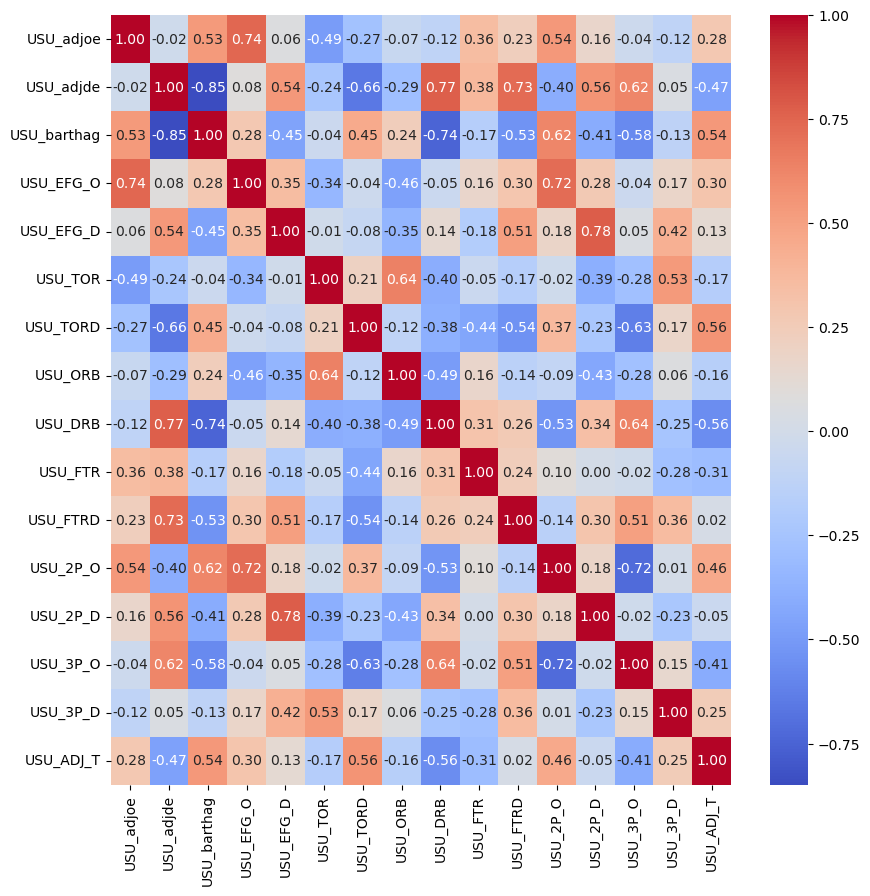

In [58]:
extended_features = [f'USU_{feature}' for feature in percentage_and_efficiency_features]

df_extended = dataset_df[extended_features]

correlation_matrix = df_extended.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Data Preprocessing

**Split training and test data**

In [59]:
train_df, test_df = train_test_split(dataset_df, test_size=0.2, random_state=10)

**Create train and test split**

In [60]:
X_train = train_df.drop(columns=['Win/Loss'])
y_train = train_df['Win/Loss']

X_test = test_df.drop(columns=['Win/Loss'])
y_test = test_df['Win/Loss']

In [61]:
most_common = y_train.value_counts().idxmax()

# Replace any values other than 'W' or 'L' with the most common value
y_train = y_train.where(y_train.isin(['W', 'L']), other=most_common)

# Map 'W' to 1 and 'L' to 0
y_train = y_train.map({'W': 1, 'L': 0})




**Split data into feature groups for pre processing**

In [62]:
drop_features = [
    'ConSOSRemain', 'rank', 'rank.1', 'proj. W', 'Proj. L', 'USU_ConSOSRemain', 
    'USU_rank', 'USU_team', 'USU_conf', 'USU_rank.1', 'USU_proj. W', 'USU_Proj. L'
    ,'record', 'Con Rec.', 'USU_record', 'USU_Con Rec.'
]

# Get all numeric features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
# Get all categorical features
categorical_features = X_train.select_dtypes(exclude=[np.number, 'bool']).columns.tolist()
binary_features = ['Home/Away']

# Filter out the drop_features
numeric_features = [feature for feature in numeric_features if feature not in drop_features and feature not in binary_features]
categorical_features = [feature for feature in categorical_features if feature not in drop_features and feature not in binary_features]



In [63]:
preprocessor = make_column_transformer(
    (
    make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown='ignore')),
        categorical_features + binary_features
    ),
    (
    make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler()),
        numeric_features
    ),
    ("drop", drop_features))

### Model Development

In [64]:
results_dict = {}

**Store models to be used as baselines**

In [65]:
models = {
    "dummy classifier": DummyClassifier(strategy="prior"),
    "logistic regressor": LogisticRegression(max_iter=1000),
    "svc rbf": SVC(kernel="rbf"),
    "random forest": RandomForestClassifier(),
    "VotingClassifier": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier()),
            ('svc', SVC(kernel="rbf"))]
    ),
    "xgboost": XGBClassifier()
}


**Define code to perform Cross Validation and compare scores**

In [66]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

**Create `Pipeline` to perform CV**

In [67]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['team', 'conf', 'Home/Away']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['adjoe', 'oe Rank', 'adjde', '...
                                  'elite SOS', 'elite noncon SOS', 'Opp OE',
                                  'Opp DE', 'Opp Proj. OE', 'Opp Proj DE',
                                  'Con Adj OE', 'Con Adj DE', 'Qual O',
                                  'Qual D', 'Qual Barthag', 'Qual Games', 'FUN',
                                  'ConPF', 'ConPA', 'ConPoss', 'ConOE', ...]),
                                ('drop', 'drop',
                                 ['ConSOSRemain', 'rank', 'rank.1', 'proj. W',
                                  'Proj. L', 'USU_ConSOSRemain', 'USU_rank',
                                  'USU_team', 'USU_conf', 'USU_rank.1',
                                  'USU_proj. W', 'USU_Proj. L', 'record',
                                  'Con Rec.', 'USU_record', 'USU_Con Rec.'])])

In [68]:
X_train.head()
for k,v in models.items():
    pipe = make_pipeline(
    (preprocessor),
    (v)
    )
    results_dict[k] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True)

In [69]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['team', 'conf',
                                                   'Home/Away']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxSc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

**Compare CV Results**

In [70]:
for k, v in results_dict.items():
    print(k)
    print(f"{pd.DataFrame(v)}\n")

dummy classifier
                             0
fit_time     0.009 (+/- 0.002)
score_time   0.003 (+/- 0.000)
test_score   0.684 (+/- 0.005)
train_score  0.684 (+/- 0.001)

logistic regressor
                             0
fit_time     0.063 (+/- 0.051)
score_time   0.006 (+/- 0.002)
test_score   0.754 (+/- 0.038)
train_score  0.854 (+/- 0.015)

svc rbf
                             0
fit_time     0.026 (+/- 0.003)
score_time   0.008 (+/- 0.004)
test_score   0.763 (+/- 0.017)
train_score  0.824 (+/- 0.005)

random forest
                             0
fit_time     0.094 (+/- 0.002)
score_time   0.005 (+/- 0.000)
test_score   0.746 (+/- 0.045)
train_score  0.991 (+/- 0.003)

VotingClassifier
                             0
fit_time     0.182 (+/- 0.010)
score_time   0.017 (+/- 0.007)
test_score   0.752 (+/- 0.023)
train_score  0.876 (+/- 0.015)

xgboost
                             0
fit_time     0.186 (+/- 0.092)
score_time   0.003 (+/- 0.000)
test_score   0.717 (+/- 0.036)
train_score  